In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

In [3]:

# Define the path to your dataset zip file in Google Drive
google_drive_path = '/content/drive/My Drive/classification/MVTec AD dataset.zip'

In [4]:
# Specify the directory where you want to extract the dataset
extract_dir = '/content/dataset/'

In [5]:
# Extract the zip file
with zipfile.ZipFile(google_drive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [6]:
import os

In [7]:
# Check the contents of the extracted dataset folder
os.listdir(extract_dir)

['MVTec AD dataset']

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install pillow

In [10]:

# Commented out IPython magic to ensure Python compatibility.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

# Update DATA_DIR to the path in your Google Colab environment
DATA_DIR = '/content/drive/My Drive/classification/MVTec AD dataset/'



sz = 224
batch_size = 32


In [11]:
# Check directory contents
os.listdir(DATA_DIR)

['train', 'valid']

In [12]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}valid'

In [13]:
os.listdir(trn_dir)

['cable', 'grid', 'bottle', 'metal_nut', 'screw', 'transistor', 'wood']

In [14]:
trn_fnames = glob.glob(f'{trn_dir}/*/*.png')
trn_fnames[:5]

['/content/drive/My Drive/classification/MVTec AD dataset/train/cable/101.png',
 '/content/drive/My Drive/classification/MVTec AD dataset/train/cable/068.png',
 '/content/drive/My Drive/classification/MVTec AD dataset/train/cable/178.png',
 '/content/drive/My Drive/classification/MVTec AD dataset/train/cable/034.png',
 '/content/drive/My Drive/classification/MVTec AD dataset/train/cable/150.png']

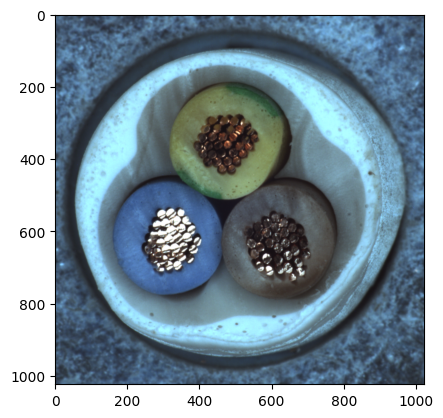

In [15]:
img = plt.imread(trn_fnames[3])
plt.imshow(img)
plt.show()  # Use plt.show() if image display doesn't work as expected

In [16]:
# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

In [17]:
use_gpu

False

In [18]:
train_ds = datasets.ImageFolder(trn_dir)

In [19]:
train_ds.classes


['bottle', 'cable', 'grid', 'metal_nut', 'screw', 'transistor', 'wood']

In [20]:
train_ds.class_to_idx

{'bottle': 0,
 'cable': 1,
 'grid': 2,
 'metal_nut': 3,
 'screw': 4,
 'transistor': 5,
 'wood': 6}

In [21]:
train_ds.root

'/content/drive/My Drive/classification/MVTec AD dataset/train'

In [22]:
train_ds.imgs

[('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/000.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/001.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/002.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/003.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/004.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/005.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/006.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/007.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/008.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/009.png',
  0),
 ('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/010.png',
  0),
 ('/content/drive/My Drive/class

In [23]:

list(zip(*train_ds.imgs))

[('/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/000.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/001.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/002.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/003.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/004.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/005.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/006.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/007.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/008.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/009.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/010.png',
  '/content/drive/My Drive/classification/MVTec AD dataset/train/bottle/011.png',
  '/content/driv

In [24]:
type(train_ds.transform)

NoneType

In [25]:
"""#Transformations : Dataloader object uses these tranformations when loading data."""

tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [26]:

train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
valid_ds = datasets.ImageFolder(val_dir, transform=tfms)

In [27]:
len(train_ds), len(valid_ds)

(1550, 172)

In [28]:
train_dl = torch.utils.data.DataLoader(train_ds,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=2)

valid_dl = torch.utils.data.DataLoader(valid_ds,
                                       batch_size=batch_size,
                                       shuffle=False,
                                       num_workers=2)
# for strong system num of workers can increase till 8 or more

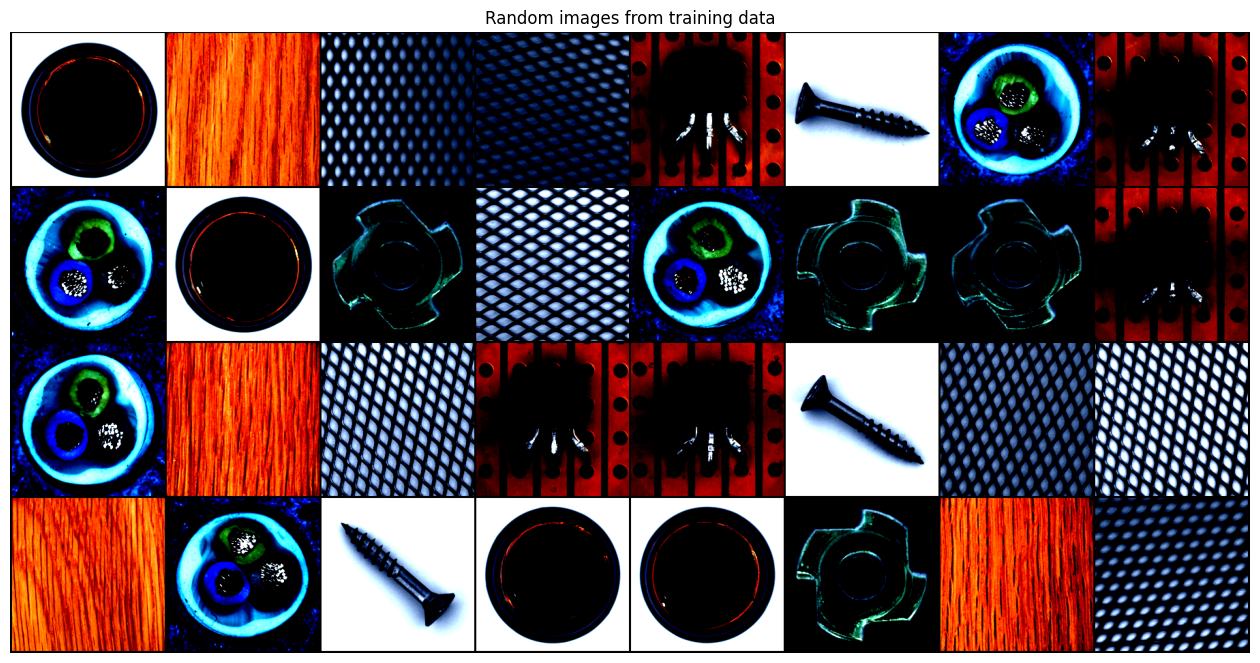

In [29]:
# Assuming you have a DataLoader named train_dl
inputs, targets = next(iter(train_dl))

# Create a grid of images (you can adjust padding as needed)
out = torchvision.utils.make_grid(inputs, padding=3)

# Convert the tensor to a NumPy array and transpose it to (height, width, channels)
out = out.permute(1, 2, 0).numpy()

# Display the random images
plt.figure(figsize=(16, 12))
plt.imshow(out)
plt.title('Random images from training data')
plt.axis('off')  # Remove axis labels
plt.show()


In [30]:
"""# Model: CNN"""

class SimpleCNN(nn.Module):
    # num of class is 7 in this dataset
    def __init__(self, num_classes=7):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Linear(56 * 56 * 32, num_classes)  # Change the output size to num_classes
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [31]:
model = SimpleCNN()

In [32]:
# transfer model to GPU, if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
model = model.to(device)

In [34]:
model

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=100352, out_features=7, bias=True)
)

In [35]:
"""# Loss function and optimizer"""

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

In [36]:

# Commented out IPython magic to ensure Python compatibility.
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = inputs.to(device)
        targets = targets.to(device)

        # forwad pass
        outputs = model(inputs)

        # loss
        loss = criterion(outputs, targets)
        losses.append(loss.item())

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # update parameters
        optimizer.step()

        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                 % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.item()))


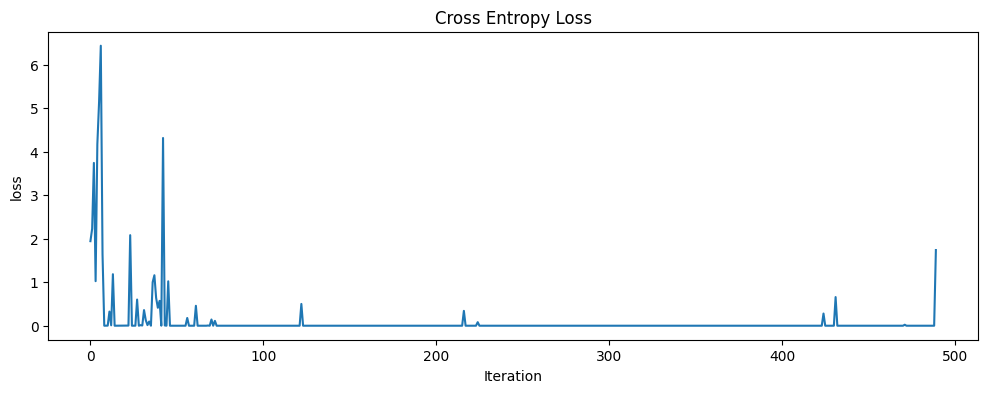

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

In [38]:
"""#Accuracy on validation data"""

def evaluate_model(model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()

    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))


In [39]:
evaluate_model(model, valid_dl, device)

accuracy: 100.00


In [40]:
evaluate_model(model, train_dl, device)

accuracy: 100.00


In [41]:

"""#visualization"""

import matplotlib.pyplot as plt
import numpy as np

def visualize_model(model, dataloader, device):
    model.eval()
    num_images = 5  # Number of images to visualize
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))

    with torch.no_grad():
        for i, (inputs, targets) in enumerate(dataloader):
            if i >= num_images:
                break
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Display the image
            image = inputs[0].cpu().numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            image = std * image + mean
            image = np.clip(image, 0, 1)

            axs[i].imshow(image)
            axs[i].set_title(f'Predicted: {preds[0].item()}')
            axs[i].axis('off')

    plt.show()


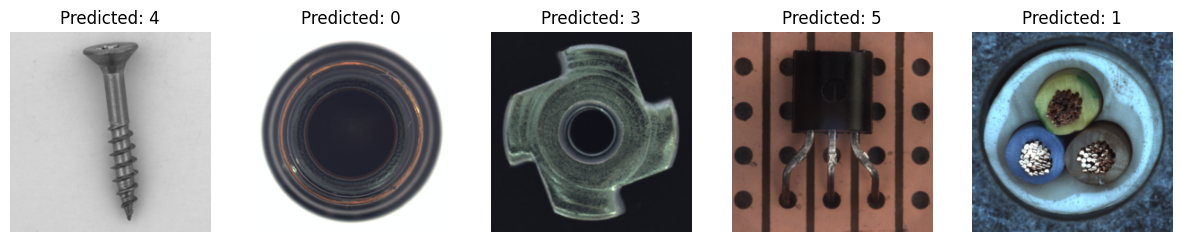

In [42]:
visualize_model(model, train_dl, device)

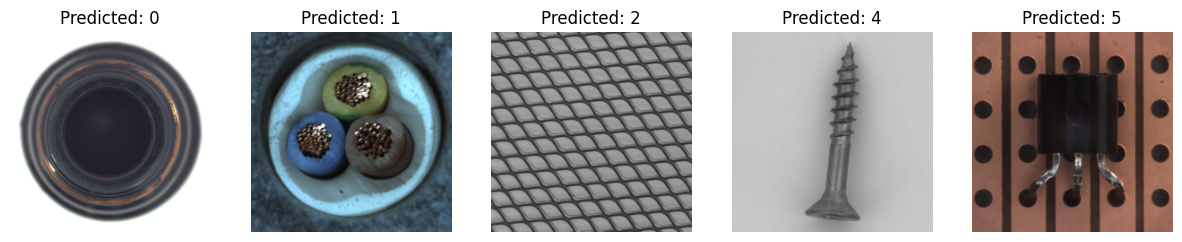

In [43]:
visualize_model(model, valid_dl, device)

In [44]:

"""# plot error"""

def plot_errors(model, dataloader, device, num_samples_to_plot=5):
    model.eval()  # Set the model to evaluation mode
    incorrect_samples = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            incorrect_mask = preds != targets
            incorrect_samples.extend([(inputs[i], preds[i], targets[i]) for i in range(len(inputs)) if incorrect_mask[i]])

    num_samples_to_plot = min(num_samples_to_plot, len(incorrect_samples))  # Ensure it doesn't exceed the available samples
    #num_samples_to_plot = 3 #  the number of incorrect samples you want to visualize
    # Rest of your code to visualize the incorrect samples
    for i in range(num_samples_to_plot):
        image, predicted, actual = incorrect_samples[i]
        image = image.cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        axs[i].imshow(image)
        axs[i].set_title(f'Predicted: {predicted.item()}, Actual: {actual.item()}')
        axs[i].axis('off')

    plt.show()


In [45]:
       # Display or save the image as needed

plot_errors(model, valid_dl, device)
# becouse our dataset was small so we dont have any error and there is nothing to show us


In [46]:

"""#Confusion matrix"""

def predict_class(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_pred.extend(preds.cpu().numpy())
            y_true.extend(targets.cpu().numpy())

    return y_pred, y_true

In [47]:
y_pred, y_true = predict_class(model, valid_dl, device)
cm = confusion_matrix(y_true, y_pred)

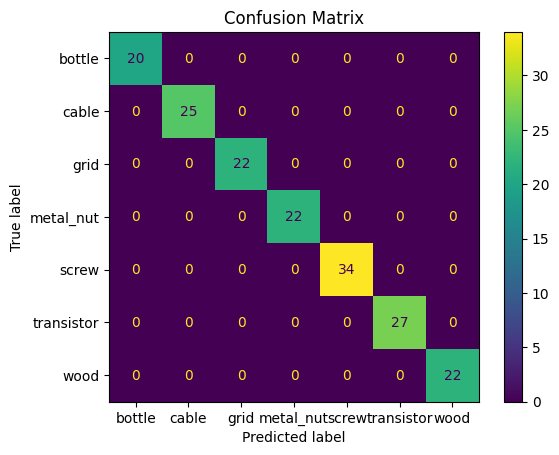

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already computed the confusion matrix (cm)
  # Replace with your actual parameters

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_ds.classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [49]:

# Data augmentation and normalization for training
train_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.01),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Just normalization for validation
valid_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [50]:

train_ds = datasets.ImageFolder(f'{DATA_DIR}train', train_transforms)
valid_ds = datasets.ImageFolder(f'{DATA_DIR}valid', valid_transforms)


In [51]:

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=True)


In [52]:
train_ds_sz = len(train_ds)
valid_ds_sz = len(valid_ds)

print('Train size: {}\nValid size: {} ({:.2f})'.format(train_ds_sz, valid_ds_sz, valid_ds_sz/(train_ds_sz + valid_ds_sz)))


Train size: 1550
Valid size: 172 (0.10)


In [53]:

class_names = train_ds.classes

import torchvision
import matplotlib.pyplot as plt
import torch

def show_images(images, title=None):
    # Convert NumPy arrays to tensors if needed
    if not isinstance(images, torch.Tensor):
        images = torch.from_numpy(images)

    # Unnormalize the images if they were normalized during preprocessing
    images = images * 0.229 + 0.485  # Inverse normalization if needed

    # Create a grid of images
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2)

    # Display the grid of images
    plt.figure(figsize=(16, 12))
    if title is not None:
        plt.title(title)
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.show()


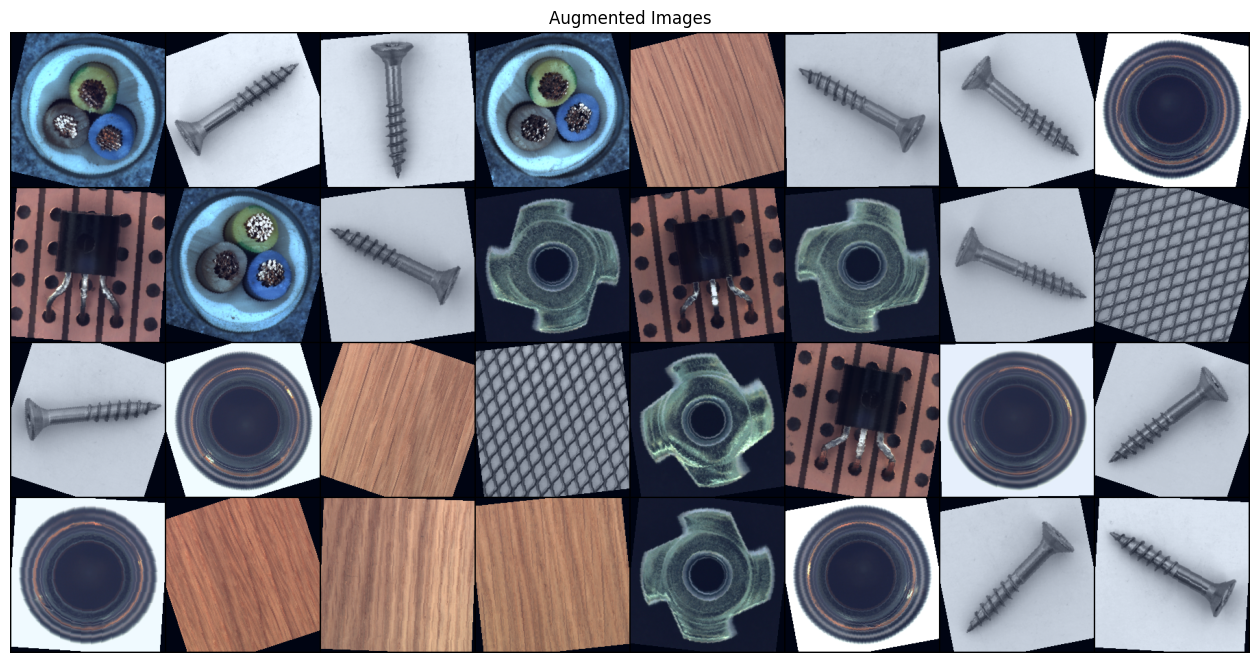

In [54]:
# Usage example:
inputs, targets = next(iter(train_dl))  # Get a batch of training data
show_images(inputs, title='Augmented Images')


In [55]:

def train_model(model, train_dl, valid_dl, criterion, optimizer, device, num_epochs=5):
    since = time.time()

    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_dl:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            total_train += labels.size(0)
            correct_train += torch.sum(preds == labels.data)

        train_loss = running_loss / len(train_dl)
        train_acc = correct_train.double() / total_train

        print('Train Loss: {:.4f} Acc: {:.4f}'.format(train_loss, train_acc))
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for inputs, labels in valid_dl:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                total_valid += labels.size(0)
                correct_valid += torch.sum(preds == labels.data)

        valid_loss = running_loss / len(valid_dl)
        valid_acc = correct_valid.double() / total_valid

        print('Valid Loss: {:.4f} Acc: {:.4f}'.format(valid_loss, valid_acc))
        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)

        # Deep copy the model if it has the best accuracy
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(best_acc))

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    return model, train_losses, valid_losses, train_accs, valid_accs


In [56]:
import copy

In [57]:
# create model
model = SimpleCNN()
model = model.to(device)


In [58]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)


In [59]:
# train
model = train_model(model, train_dl, valid_dl, criterion, optimizer, device, num_epochs=5)


Epoch 1/5
----------
Train Loss: 0.7193 Acc: 0.9161
Valid Loss: 0.0000 Acc: 1.0000
Epoch 2/5
----------
Train Loss: 0.0000 Acc: 1.0000
Valid Loss: 0.0000 Acc: 1.0000
Epoch 3/5
----------
Train Loss: 0.0615 Acc: 0.9974
Valid Loss: 0.4854 Acc: 0.9419
Epoch 4/5
----------
Train Loss: 0.0555 Acc: 0.9916
Valid Loss: 0.0000 Acc: 1.0000
Epoch 5/5
----------
Train Loss: 0.0000 Acc: 1.0000
Valid Loss: 0.0000 Acc: 1.0000
Training complete in 18m 56s
Best val Acc: 1.0000


In [60]:
# transfer leraning

import torchvision.models as models

# Load pre-trained ResNet-50
model = models.resnet50(pretrained=True)

# Modify the last fully connected layer for your specific classification task
num_classes = 7  # the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 101MB/s]


In [61]:
import copy

In [62]:
num_epochs = 2  # Replace with the desired number of epochs

model = train_model(model, train_dl, valid_dl, criterion, optimizer, device, num_epochs)


Epoch 1/2
----------
Train Loss: 0.2847 Acc: 0.9413
Valid Loss: 0.0021 Acc: 1.0000
Epoch 2/2
----------
Train Loss: 0.0033 Acc: 1.0000
Valid Loss: 0.0012 Acc: 1.0000
Training complete in 42m 30s
Best val Acc: 1.0000


In [63]:

import torch

def evaluate_model(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    corrects = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()

    accuracy = 100.0 * corrects / len(dataloader.dataset)

    return model, accuracy


In [65]:
#model = evaluate_model(model, valid_dl, device)
#accuracy = calculate_accuracy(model, valid_dl, device)
#print(f'Validation Accuracy: {accuracy:.2f}%')

#evaluate_model(model, valid_dl, device)

#visualize_model(model, valid_dl, device, num_images=6)

#plot_errors(model, valid_dl, device)